#### Given data 
House sale prices for King County homes sold between May 2014 and May 2015.
#### Problem 
Build a model that predicts the price of a house, given set of features of the house.
#### Dataset Link
https://www.kaggle.com/harlfoxem/housesalesprediction
#### Solution Implementation
Tensorflow 2.0 with Keras - ReLU

***
#### 1.Loading all the Libraries

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### 2.Exploratory Data Analysis

In [146]:
data = pd.read_csv('DATA/kc_house_data.csv')

***
##### Peak of Data

In [7]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### Observations
* Each house is given unique ID , which will not be useful for our modelling.
* Date of purchase is given, day may not be usefull, but we can analyze month and year.

***
##### Check stats and any nulls in data

In [8]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


##### Observations
* No Null Values present in entire dataset.
* There are total of 21 feature columns
* We are unable much of information from the stats, but Price ranges from 78,000 USD to 77,00,000 USD
* Visualize the distribution of Price to understand.
* Date of purchase is given, day may not be usefull, but we can analyze month and year.

***
##### Examine the distribution of Price

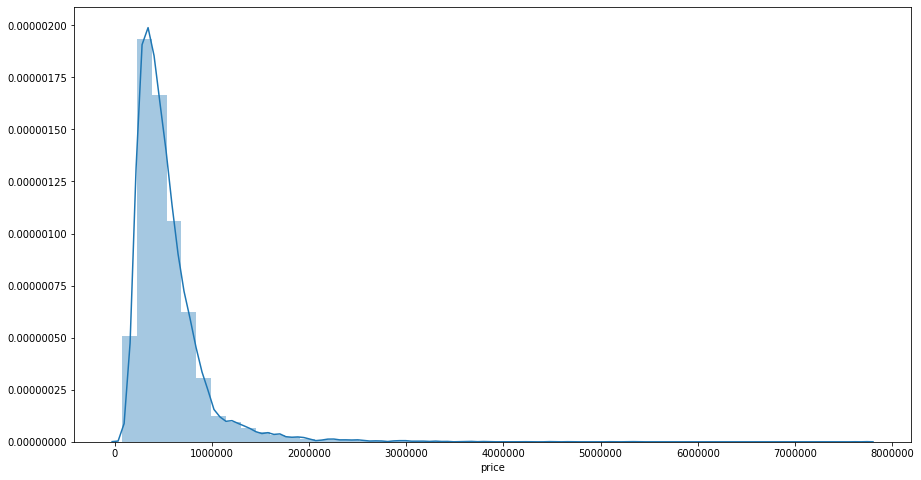

In [107]:
plt.figure(figsize=(15,8))
sns.distplot(data['price'])
plt.show()

##### Observations
* Most of the House fall in price range of 78,000-3,00,000 roughly and rest of the house prices/houses above can be considerd as  outliers.
* Also the peak is somewhere around 50,000 USD, meaning the budget house price in the area is 50K USD.

***
##### Correlation of Features with respect to Price

In [17]:
data.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

##### Observations - Crucial Features 
* **Square Feet** is highly correlated.Intuitively, even in India, we purchase Flats by per SFT Price, rest will be amenities.
* Another factor to be considerd is **Number of Bedrooms** as it is also crucial in general.
* **Latitude and Longitude** is also crucial to decide the area / locality in deciding the prices.
* **ZipCode/Pincode** helps in identifying the location such as city/town etc.
* **Year Renovated** is another key factor, as normally the latest renovated houses price higher than those of never.(excluding the newly built houses).
* One more interesting feature is **Water Front** ,the water/sea facing houses.


***
##### Analysis of Living Area SFT with respect to Price

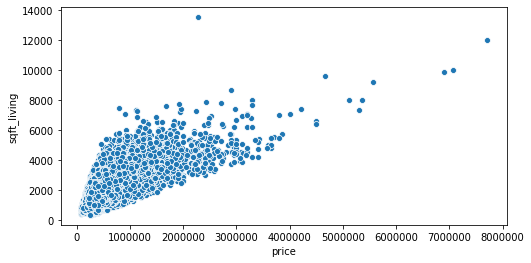

In [112]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='price',y='sqft_living',data=data)
plt.show()

##### Observations
* As examined previously, most of the House fall in price range of  78,000-3,00,000 USD and notable outliers after 400K USD.

***
##### Analysis of Bedrooms with respect to Price

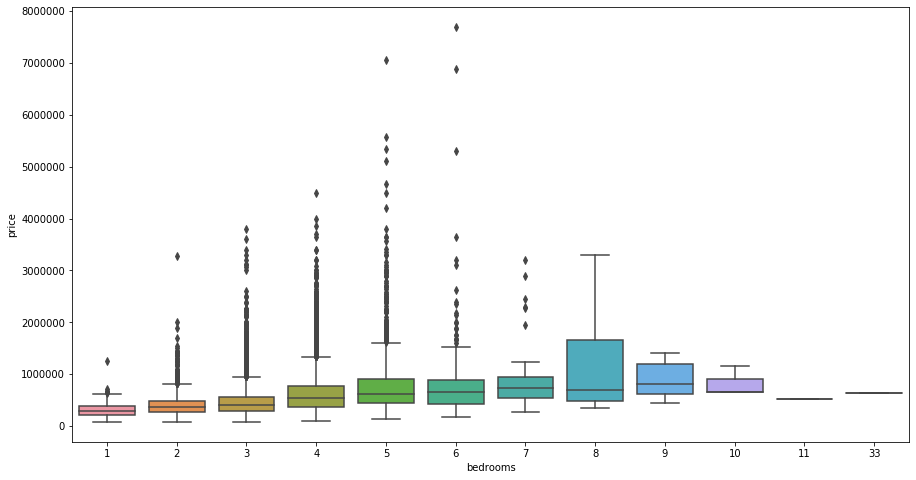

In [115]:
plt.figure(figsize=(15,8))
sns.boxplot(x='bedrooms',y='price',data=data)
plt.show()

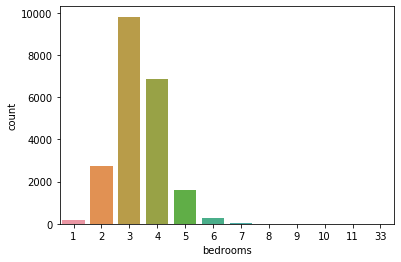

In [120]:
sns.countplot(data['bedrooms'])
plt.show()

##### Observations
* From the Box-Plot , we are unable to infer anything much, so we can draw a box plot to understand the bedrooms.
* Most of the houses are 3BHK followed by 4 and 2.
* Though bedrooms is numeric,it is a discrete number.

***
##### Latitude and Longitude with Price ranges

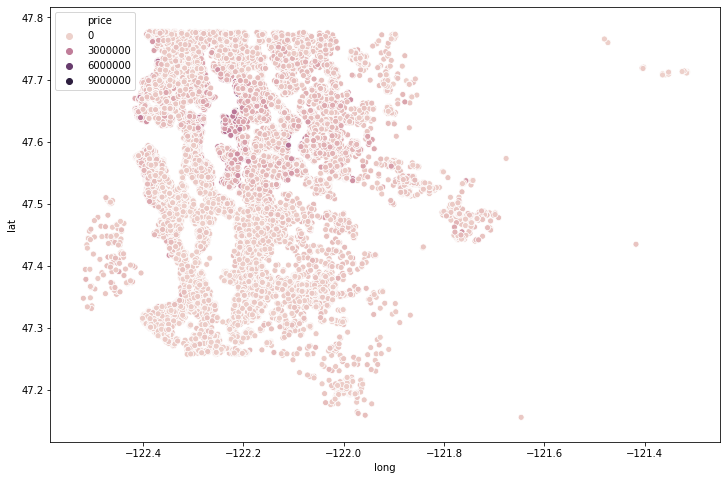

In [129]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=data,hue='price')
plt.show()

##### Observations
* Though the graph is a bit unclear, but we can see darkspots roughly at (-122.2,47.6) indicating higher price around the area.
* May be the outliers influence is making bit harder to understand, let us remove very high price houses.

##### Check top 20 highly priced values

In [130]:
data.sort_values('price',ascending=False).head(20)['price']

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
8629     4490000.0
12358    4210000.0
4145     4000000.0
2083     3850000.0
7028     3800000.0
19002    3800000.0
16288    3710000.0
18467    3650000.0
6502     3650000.0
15241    3640000.0
19133    3640000.0
Name: price, dtype: float64

##### Observations
* Just from 20 observations the price collapsed from 7700000 USD to 3640000, a 50 % reduction in price,which needs to be adressed.
* We can remove 1 % of total data of the highly priced houses.

In [135]:
trimmed_data = data.sort_values('price',ascending=False).iloc[int(np.ceil(len(data) * 0.01)) :] #99 % of data with increasing price

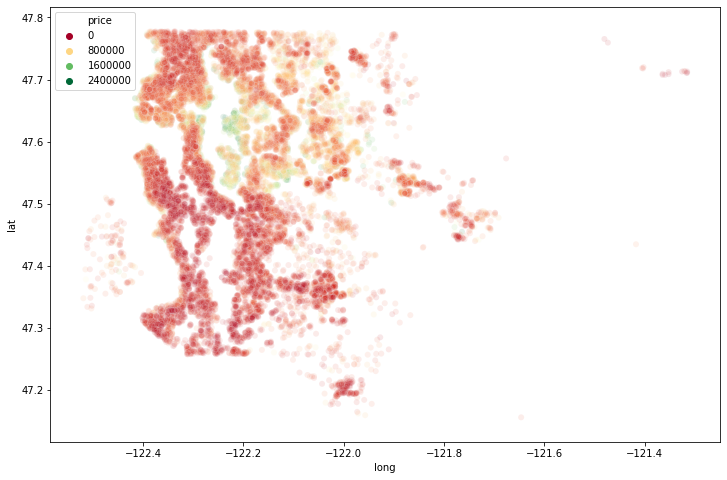

In [137]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=trimmed_data,hue='price',alpha=0.1,palette='RdYlGn')
plt.show()

##### Observations
* Now , we can see green patches/dots which are around a water body.
* Let us understand price relation with waterfront feature

***
##### Impact of Water Front House with Price

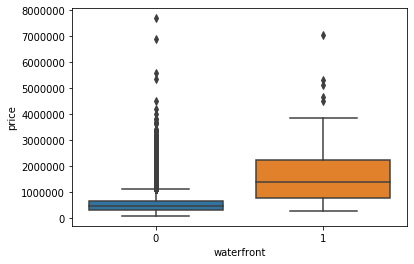

In [45]:
sns.boxplot(x='waterfront',y='price',data=data)

##### Observations
* As expected, houses which are with waterfront are bit more pricy than those of don't.

#### 3.Feature Engineering

* House ID is not going to influence the house price.
* The Date column can be broken down into year and month, in a hope to find any trend in the housing prices.
* We also need to check ZipCode and Year Renovated Columns and check if they can be hot-encoded.

In [147]:
data = data.drop('id',axis=1)
data['date'] = pd.to_datetime(data['date'])
data['year']  = data['date'].apply(lambda date : date.year)
data['month'] = data['date'].apply(lambda date : date.month)
data = data.drop('date',axis=1)

***
##### Impact of Month,Year on Price

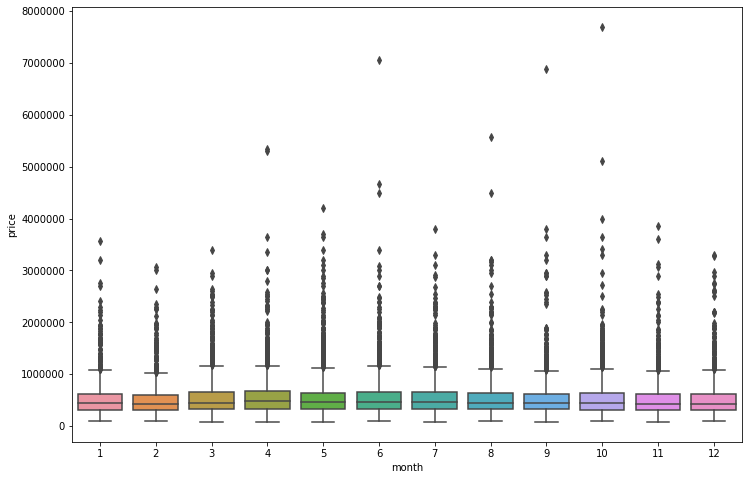

In [148]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month',y='price',data=data)
plt.show()

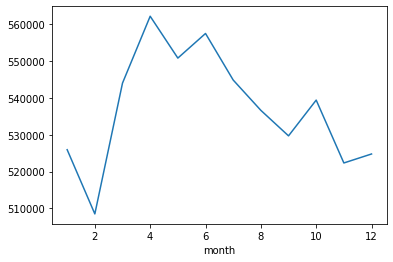

In [144]:
data.groupby('month').mean()['price'].plot()
plt.show()

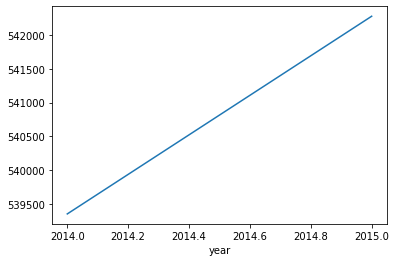

In [145]:
data.groupby('year').mean()['price'].plot()
plt.show()

##### Observations
* Price shows some fluctuations with Month, even though it only varies within 510k and 560K we will keep it.
* Price with Year always kept on increasing, indicating more movement of people, so as the demand of houses.

***
##### Zipcode with Price

In [64]:
data['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [65]:
data = data.drop('zipcode',axis=1)

##### Observations
* There are total 70 zipcodes, definitely we need to hot-encode these if we are considering them as they should not be treated as numeric,resulting in 90 features.
* Another way is manual grouping based on geo-graphical grouping of zipcodes to groups less than 10.

***
##### Year Renovated with Price

In [66]:
`data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [215]:
print("Median Price of Homes renovated in 2014",data[(data['yr_renovated']==2014)]['price'].median())
print("Median Price of Homes renovated in 2013" ,data[(data['yr_renovated']==2013)]['price'].median())
print("Median Price of Homes renovated in 2012" ,data[(data['yr_renovated']==2012)]['price'].median())

Median Price of Homes renovated in 2014 575000.0
Median Price of Homes renovated in 2013 560000.0
Median Price of Homes renovated in 2012 515000.0


##### Observations
* By Intuition, newly renovated homes are more pricer than the others.
* We considerd median , to prevent the outlier effect, if we use mean, we should considerd all the features of the house.
* So, if higher the year, the more the price.
* There is no need to encode them as categories as the number itself is having direct relationship with price.
***

#### 4.Model Building 

In [68]:
X = data.drop('price',axis=1).values
y = data['price'].values

In [70]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [72]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
model = Sequential()
model.add(Dense(19,activation='relu')) # We are using 19 units for 19 Features
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [82]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400,verbose=0)

#### 5.Model Evaluation

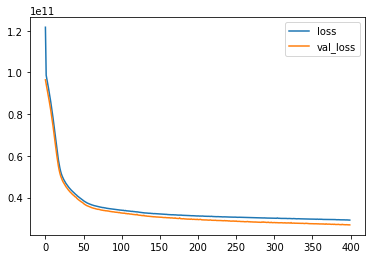

In [219]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [88]:
predictions = model.predict(X_test)

In [222]:
print("Mean Squared Error = ",mean_squared_error(y_test,predictions))
print("Mean Absolute Error = ",mean_absolute_error(y_test,predictions))
print("Explained Variance = ",explained_variance_score(y_test,predictions))

Mean Squared Error =  26937044495.868454
Mean Absolute Error =  101941.16727309993
Explained Variance =  0.7968801215599064


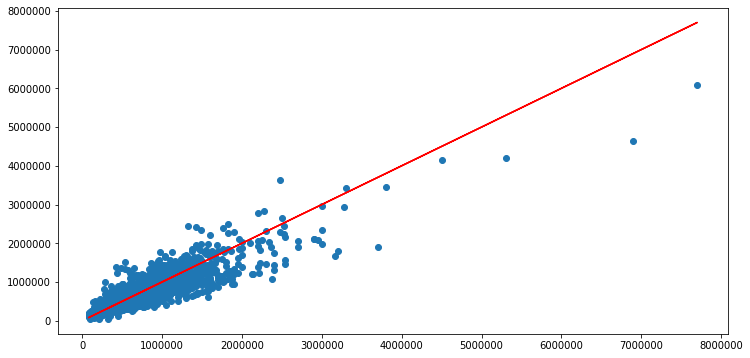

In [217]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.show()

#### Given the Mean value of Price as 540 K USD , our model predicts with a 101 K variation, which is an OK model, but not best in realtime ML Scenarios.

#### Reference
* Thanks to Jose Portilla for explaining this problem in his <a href="https://tcsglobal.udemy.com/course/complete-tensorflow-2-and-keras-deep-learning-bootcamp" target="_blank">Deep Learning Bootcamp Course.</a> 
